## 1)

1.Função de perda usada
- AdaBoost: minimiza uma função de perda exponencial (erros recebem peso cada vez maior).
- GBM: permite otimizar funções de perda arbitrárias (ex.: log-loss para classificação, MSE para regressão, etc.).

2.Atualização dos pesos dos exemplos
- AdaBoost: aumenta o peso das amostras mal classificadas a cada iteração, forçando o próximo modelo a focar nelas.
- GBM: não reatribui pesos explicitamente; em vez disso, ajusta os modelos para o gradiente negativo da função de perda (gradiente descendente).

3. Tipo de combinação
- AdaBoost: combinação baseada em um fator de erro de cada modelo (α), que ajusta a influência de cada weak learner.
- GBM: combinação feita somando os modelos ajustados ao gradiente, com um fator de learning_rate para controlar o passo.

4.  Flexibilidade
- AdaBoost: mais restrito, funciona muito bem em classificação binária e pode ser estendido para multiclasse.
- GBM: mais geral e flexível, usado em regressão, classificação, ranking, séries temporais, etc.

5. Sensibilidade a outliers
- AdaBoost: mais sensível a outliers, porque insiste em aumentar o peso de exemplos difíceis (mesmo que sejam ruído).
- GBM: geralmente mais robusto a outliers, pois o gradiente de certas funções de perda (ex.: Huber loss) não explode tanto.

In [1]:
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import (accuracy_score, roc_auc_score, ConfusionMatrixDisplay,
                             RocCurveDisplay, r2_score, mean_squared_error, mean_absolute_error)
import matplotlib.pyplot as plt
import numpy as np


Acurácia (teste): 0.9580
ROC AUC (teste): 0.9929


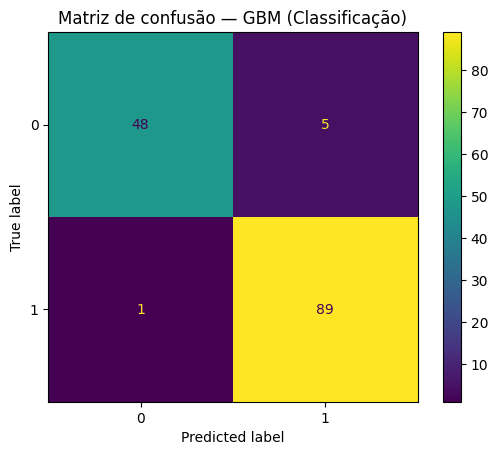

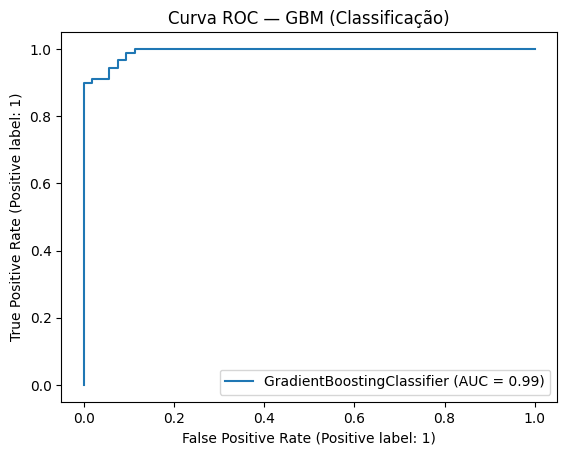

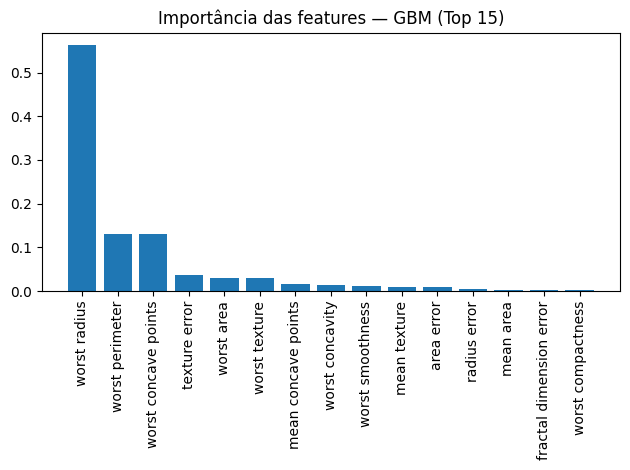

R2 (teste): 0.4152
RMSE (teste): 56.8650
MAE (teste): 44.9362


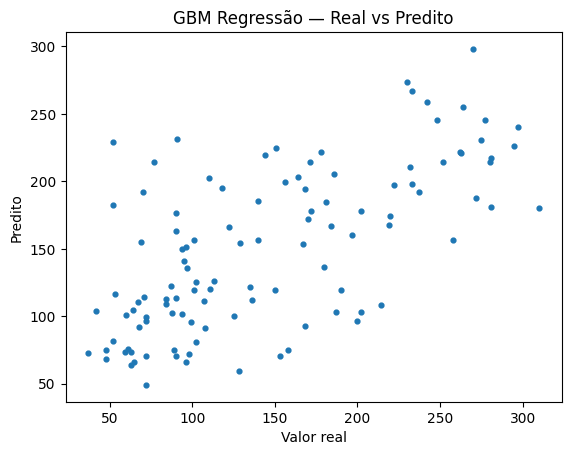

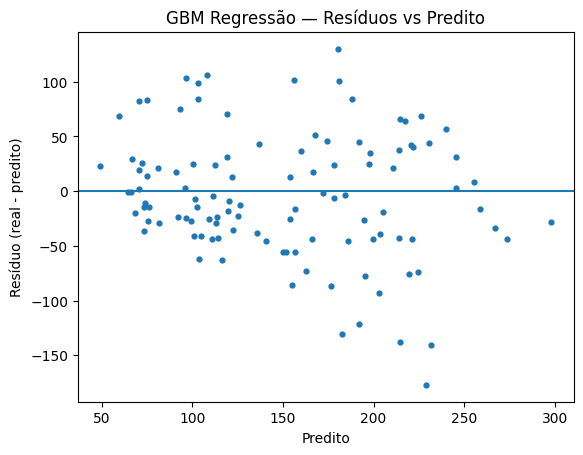

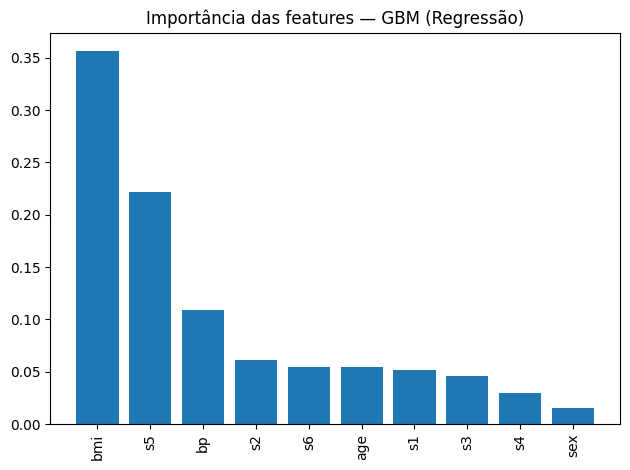

[Classificação] Acurácia: 0.9580 | ROC AUC: 0.9766


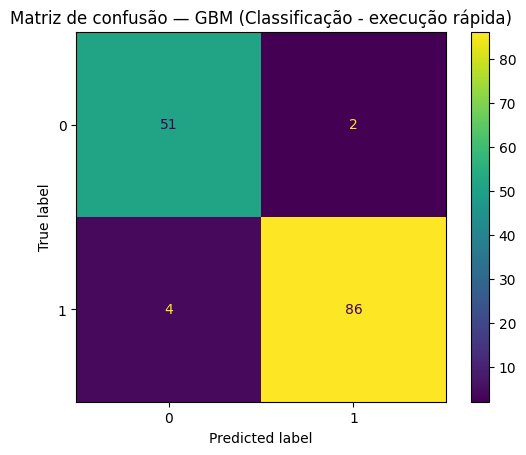

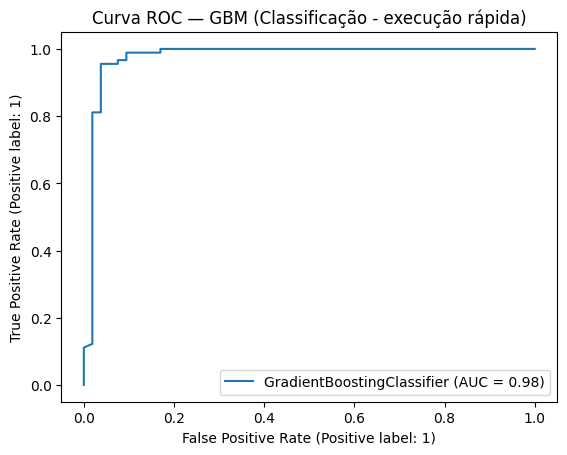

[Regressão] R2: 0.2007 | RMSE: 62.9940 | MAE: 49.6497


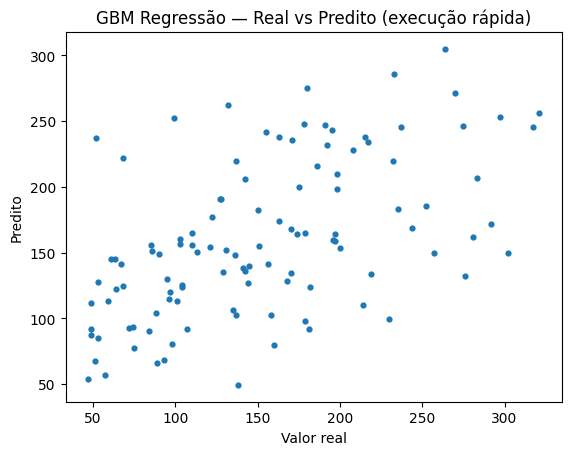

In [3]:
## 2)

# Parte 1 — CLASSIFICAÇÃO (Breast Cancer)

# Dados
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Modelo (GBM - Classifier)
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbc.fit(X_train, y_train)

# Predições e métricas
y_pred = gbc.predict(X_test)
y_proba = gbc.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"Acurácia (teste): {acc:.4f}")
print(f"ROC AUC (teste): {auc:.4f}")

# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Matriz de confusão — GBM (Classificação)")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Curva ROC — GBM (Classificação)")
plt.show()

# Importâncias das features (plot simples)
importances = gbc.feature_importances_
order = np.argsort(importances)[::-1][:15]
plt.figure()
plt.bar(range(len(order)), importances[order])
plt.xticks(range(len(order)), X.columns[order], rotation=90)
plt.title("Importância das features — GBM (Top 15)")
plt.tight_layout()
plt.show()


# Parte 2 — REGRESSÃO (Diabetes)

# Dados
d = load_diabetes(as_frame=True)
Xr, yr = d.data, d.target
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.25, random_state=42
)

# Modelo (GBM - Regressor)
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr.fit(Xr_train, yr_train)

# Predições e métricas
yr_pred = gbr.predict(Xr_test)

r2 = r2_score(yr_test, yr_pred)
rmse = mean_squared_error(yr_test, yr_pred, squared=False)
mae = mean_absolute_error(yr_test, yr_pred)
print(f"R2 (teste): {r2:.4f}")
print(f"RMSE (teste): {rmse:.4f}")
print(f"MAE (teste): {mae:.4f}")

# Gráfico: valores reais vs preditos
plt.figure()
plt.scatter(yr_test, yr_pred, s=12)
plt.xlabel("Valor real")
plt.ylabel("Predito")
plt.title("GBM Regressão — Real vs Predito")
plt.show()

# Gráfico: resíduos
residuos = yr_test - yr_pred
plt.figure()
plt.scatter(yr_pred, residuos, s=12)
plt.axhline(0)
plt.xlabel("Predito")
plt.ylabel("Resíduo (real - predito)")
plt.title("GBM Regressão — Resíduos vs Predito")
plt.show()

# Importâncias das features
importances_r = gbr.feature_importances_
order_r = np.argsort(importances_r)[::-1]
plt.figure()
plt.bar(range(len(order_r)), importances_r[order_r])
plt.xticks(range(len(order_r)), Xr.columns[order_r], rotation=90)
plt.title("Importância das features — GBM (Regressão)")
plt.tight_layout()
plt.show()




# Classification quick run
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_proba = gbc.predict_proba(X_test)[:, 1]
print(f"[Classificação] Acurácia: {accuracy_score(y_test, y_pred):.4f} | ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Matriz de confusão — GBM (Classificação - execução rápida)")
plt.show()
RocCurveDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Curva ROC — GBM (Classificação - execução rápida)")
plt.show()

# Regression quick run
d = load_diabetes(as_frame=True)
Xr, yr = d.data, d.target
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.25, random_state=0)
gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.05, max_depth=3, random_state=0)
gbr.fit(Xr_train, yr_train)
yr_pred = gbr.predict(Xr_test)
print(f"[Regressão] R2: {r2_score(yr_test, yr_pred):.4f} | RMSE: {mean_squared_error(yr_test, yr_pred, squared=False):.4f} | MAE: {mean_absolute_error(yr_test, yr_pred):.4f}")

# Display one quick plot for regression
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(yr_test, yr_pred, s=12)
plt.xlabel("Valor real")
plt.ylabel("Predito")
plt.title("GBM Regressão — Real vs Predito (execução rápida)")
plt.show()

## 3)

1. n_estimators
- Número de árvores (iterações de boosting).
- Mais árvores → maior capacidade de aprendizado, mas risco de overfitting.

2. learning_rate
- Fator que escala a contribuição de cada árvore adicionada.
- Valores menores → aprendizado mais lento, mas geralmente melhor generalização (precisa aumentar n_estimators).
- Valores maiores → aprendizado mais rápido, mas risco de overfitting.

3. max_depth (ou max_leaf_nodes)
- Controla a profundidade das árvores base.
- Árvores rasas (baixa profundidade) → modelos mais simples, menos overfitting.
- Árvores profundas → capturam interações complexas, mas podem sobreajustar.

4. subsample
- Proporção de amostras usada para treinar cada árvore (default = 1.0, ou seja, todas).
- Valores menores (<1) adicionam aleatoriedade : ajudam a reduzir variância e overfitting (semelhante a bagging).

5. min_samples_split / min_samples_leaf
- Parâmetros que definem o mínimo de amostras para dividir um nó e o mínimo de amostras em uma folha.
- Valores maiores → árvores mais “suavizadas”, menos complexas.
- Valores pequenos → árvores mais detalhadas, maior risco de overfitting.

## 5)

1. Aleatoriedade / regularização
- O uso de subsampling introduz aleatoriedade no modelo, o que ajuda a evitar overfitting. Menos chance de o modelo “ajustar demais” particularidades dos dados de treino. 
ScienceDirect
+1

2. Velocidade de aprendizado
- Ao usar menos amostras em cada iteração, cada árvore é treinada com menos dados → treinamento potencialmente mais rápido. 
ScienceDirect
+1

3. Maior robustez
- Subamostras ajudam na variância do modelo. Menos propenso a ajustes muito finos em ruídos do dataset. É uma técnica de regularização natural. 
ScienceDirect
+1

4. Hiperparâmetro novo: subsample
- Agora há um hiperparâmetro que define o tamanho da amostra em cada iteração (f). Isso introduz um novo grau de liberdade/responsabilidade no ajuste do modelo. 
ResearchGate
+1

5. Estimativas fora da amostra (“out-of-bag”)
- Como parte dos dados ficam fora da subamostra em cada iteração, esses exemplos externos podem servir para avaliar o erro fora da bolsa (out-of-bag), parecido com bagging. Isso permite uma estimativa de performance sem precisar sempre de validação separada.